<a href="https://colab.research.google.com/github/A24bhi/NavieBayes/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/nasa.csv',na_values=['?',' ','N/A'])

In [36]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [38]:
df.shape

(4687, 40)

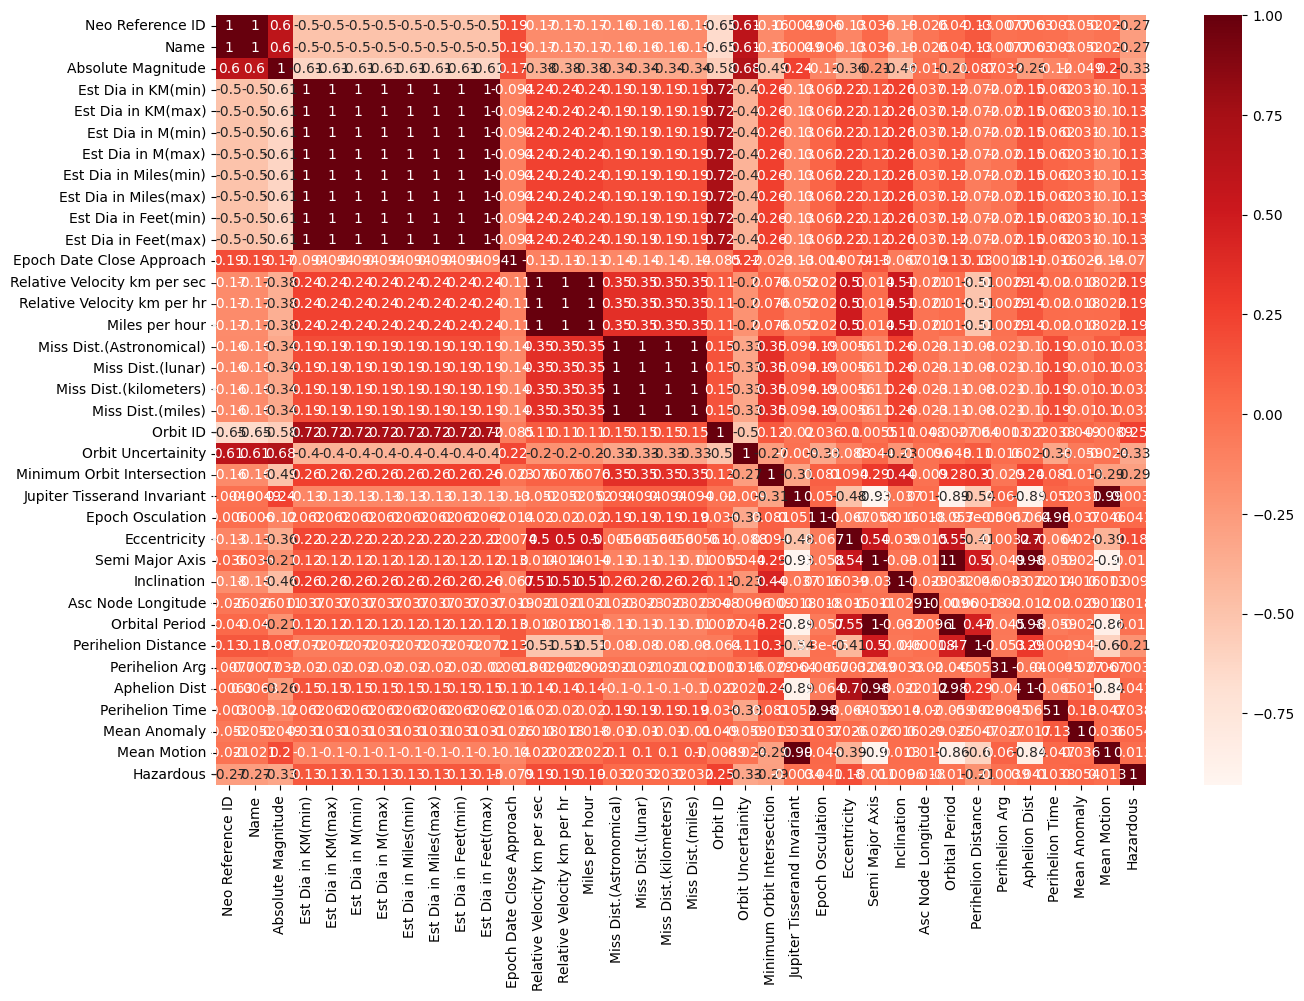

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),cmap='Reds',annot=True)
plt.show()

In [40]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [41]:
df=df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)','Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)','Relative Velocity km per sec','Relative Velocity km per hr', 'Miles per hour','Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(kilometers)'],axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
encoder = LabelEncoder()

In [44]:
for x in df.columns:
  if df[x].dtype=='object':
    df[x]=encoder.fit_transform(df[x])

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [46]:
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [47]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       Features     VIF Score
0              Neo Reference ID           inf
1                          Name           inf
2            Absolute Magnitude  4.446857e+00
3            Est Dia in KM(min)  2.581450e+00
4           Close Approach Date  6.226245e+04
5     Epoch Date Close Approach  2.270094e+06
6             Miss Dist.(miles)  1.329404e+00
7                 Orbiting Body           NaN
8                      Orbit ID  3.106640e+00
9      Orbit Determination Date  1.816426e+00
10           Orbit Uncertainity  2.527040e+00
11   Minimum Orbit Intersection  2.062447e+00
12  Jupiter Tisserand Invariant  1.217967e+03
13             Epoch Osculation  2.638426e+01
14                 Eccentricity  1.899400e+01
15              Semi Major Axis           inf
16                  Inclination  5.067173e+00
17           Asc Node Longitude  1.008172e+00
18               Orbital Period  1.035421e+03
19          Perihelion Distance           inf
20               Perihelion Arg  1

In [48]:
for i in range(x.shape[1]):
  vif(x.values,i)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [49]:
df =df.drop('Equinox',axis=1)

In [50]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       Features     VIF Score
0              Neo Reference ID           inf
1                          Name           inf
2            Absolute Magnitude  4.446857e+00
3            Est Dia in KM(min)  2.581450e+00
4           Close Approach Date  6.226245e+04
5     Epoch Date Close Approach  2.270094e+06
6             Miss Dist.(miles)  1.329404e+00
7                 Orbiting Body           NaN
8                      Orbit ID  3.106640e+00
9      Orbit Determination Date  1.816426e+00
10           Orbit Uncertainity  2.527040e+00
11   Minimum Orbit Intersection  2.062447e+00
12  Jupiter Tisserand Invariant  1.217967e+03
13             Epoch Osculation  2.638426e+01
14                 Eccentricity  1.899400e+01
15              Semi Major Axis           inf
16                  Inclination  5.067173e+00
17           Asc Node Longitude  1.008172e+00
18               Orbital Period  1.035421e+03
19          Perihelion Distance           inf
20               Perihelion Arg  1

In [51]:
df =df.drop('Orbiting Body',axis=1)

In [54]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Features     VIF Score
0              Neo Reference ID           inf
1                          Name           inf
2            Absolute Magnitude  4.446857e+00
3            Est Dia in KM(min)  2.581450e+00
4           Close Approach Date  6.226245e+04
5     Epoch Date Close Approach  2.270094e+06
6             Miss Dist.(miles)  1.329404e+00
7                      Orbit ID  3.106640e+00
8      Orbit Determination Date  1.816426e+00
9            Orbit Uncertainity  2.527040e+00
10   Minimum Orbit Intersection  2.062447e+00
11  Jupiter Tisserand Invariant  1.217967e+03
12             Epoch Osculation  2.638426e+01
13                 Eccentricity  1.899400e+01
14                  Inclination  5.067173e+00
15           Asc Node Longitude  1.008172e+00
16               Orbital Period  1.035421e+03
17          Perihelion Distance  5.712869e+01
18               Perihelion Arg  1.012977e+00
19                Aphelion Dist  1.545301e+03
20              Perihelion Time  2

In [57]:
df =df.drop('Semi Major Axis',axis=1)

KeyError: "['Semi Major Axis'] not found in axis"

In [55]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Features     VIF Score
0              Neo Reference ID           inf
1                          Name           inf
2            Absolute Magnitude  4.446857e+00
3            Est Dia in KM(min)  2.581450e+00
4           Close Approach Date  6.226245e+04
5     Epoch Date Close Approach  2.270094e+06
6             Miss Dist.(miles)  1.329404e+00
7                      Orbit ID  3.106640e+00
8      Orbit Determination Date  1.816426e+00
9            Orbit Uncertainity  2.527040e+00
10   Minimum Orbit Intersection  2.062447e+00
11  Jupiter Tisserand Invariant  1.217967e+03
12             Epoch Osculation  2.638426e+01
13                 Eccentricity  1.899400e+01
14                  Inclination  5.067173e+00
15           Asc Node Longitude  1.008172e+00
16               Orbital Period  1.035421e+03
17          Perihelion Distance  5.712869e+01
18               Perihelion Arg  1.012977e+00
19                Aphelion Dist  1.545301e+03
20              Perihelion Time  2

In [56]:
df =df.drop('Aphelion Dist',axis=1)

In [58]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Features     VIF Score
0              Neo Reference ID           inf
1                          Name           inf
2            Absolute Magnitude  4.396763e+00
3            Est Dia in KM(min)  2.580174e+00
4           Close Approach Date  6.225942e+04
5     Epoch Date Close Approach  2.269983e+06
6             Miss Dist.(miles)  1.324597e+00
7                      Orbit ID  3.103400e+00
8      Orbit Determination Date  1.816066e+00
9            Orbit Uncertainity  2.519324e+00
10   Minimum Orbit Intersection  2.055861e+00
11  Jupiter Tisserand Invariant  6.791451e+02
12             Epoch Osculation  2.637282e+01
13                 Eccentricity  1.503686e+01
14                  Inclination  3.431042e+00
15           Asc Node Longitude  1.008022e+00
16               Orbital Period  1.798658e+01
17          Perihelion Distance  1.573915e+01
18               Perihelion Arg  1.011828e+00
19              Perihelion Time  2.768199e+01
20                 Mean Anomaly  1

In [59]:
df =df.drop('Jupiter Tisserand Invariant',axis=1)

In [60]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Features     VIF Score
0             Neo Reference ID           inf
1                         Name           inf
2           Absolute Magnitude  4.362930e+00
3           Est Dia in KM(min)  2.549994e+00
4          Close Approach Date  6.225573e+04
5    Epoch Date Close Approach  2.269843e+06
6            Miss Dist.(miles)  1.323429e+00
7                     Orbit ID  3.091833e+00
8     Orbit Determination Date  1.815917e+00
9           Orbit Uncertainity  2.511582e+00
10  Minimum Orbit Intersection  2.050239e+00
11            Epoch Osculation  2.634518e+01
12                Eccentricity  1.359708e+01
13                 Inclination  1.572396e+00
14          Asc Node Longitude  1.007515e+00
15              Orbital Period  8.798609e+00
16         Perihelion Distance  1.498933e+01
17              Perihelion Arg  1.010832e+00
18             Perihelion Time  2.766150e+01
19                Mean Anomaly  1.237810e+00
20                 Mean Motion  7.539940e+00


In [61]:
df =df.drop('Epoch Date Close Approach',axis=1)

In [62]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

                      Features     VIF Score
0             Neo Reference ID           inf
1                         Name           inf
2           Absolute Magnitude  2.632074e+02
3           Est Dia in KM(min)  3.330528e+00
4          Close Approach Date  5.397456e+00
5            Miss Dist.(miles)  5.429173e+00
6                     Orbit ID  4.779945e+00
7     Orbit Determination Date  7.402101e+00
8           Orbit Uncertainity  5.609237e+00
9   Minimum Orbit Intersection  3.754486e+00
10            Epoch Osculation  1.873705e+08
11                Eccentricity  7.457530e+01
12                 Inclination  3.924368e+00
13          Asc Node Longitude  3.806567e+00
14              Orbital Period  3.461756e+01
15         Perihelion Distance  1.839578e+02
16              Perihelion Arg  4.203003e+00
17             Perihelion Time  1.873897e+08
18                Mean Anomaly  4.753591e+00
19                 Mean Motion  4.248139e+01


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [63]:
df =df.drop('Perihelion Time',axis=1)

In [64]:
x=df.drop('Hazardous',axis=1)

vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF Score']=[vif(x.values,i) for i in range(x.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Features   VIF Score
0             Neo Reference ID         inf
1                         Name         inf
2           Absolute Magnitude  263.206802
3           Est Dia in KM(min)    3.330397
4          Close Approach Date    5.397456
5            Miss Dist.(miles)    5.428911
6                     Orbit ID    4.779814
7     Orbit Determination Date    7.401644
8           Orbit Uncertainity    5.608057
9   Minimum Orbit Intersection    3.752487
10            Epoch Osculation  896.650946
11                Eccentricity   74.575257
12                 Inclination    3.921676
13          Asc Node Longitude    3.806563
14              Orbital Period   34.607728
15         Perihelion Distance  183.957677
16              Perihelion Arg    4.200375
17                Mean Anomaly    3.889229
18                 Mean Motion   42.473083


In [65]:
x=df.drop('Hazardous',axis=1)
y=df['Hazardous']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [67]:
model=GaussianNB()

In [68]:
model.fit(x_train,y_train)

GaussianNB()

In [69]:
pred=model.predict(x_test)

In [70]:
accuracy_score(y_test,pred)

0.767590618336887

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.83      0.86       802
        True       0.29      0.42      0.34       136

    accuracy                           0.77       938
   macro avg       0.59      0.62      0.60       938
weighted avg       0.81      0.77      0.78       938

